# Introduction to Simulation

## What is simulation?

#### In general, when someone says "simulation" they typically mean:
 * a set of rules to describe a system (i.e., a model)
 * the use of a set of "rules" to predict the behavior of a model under specific conditions.
 
#### The specific rules (and the methods to evaluate them) will depend strongly on the discipline. 
> For example, the rules used to perform simulations of molecules are very different than those used to perform simulations of electronic circuits, assembly lines, traffic patterns, weather, galaxies, etc. 

#### Note, the rules (i.e., model) may be very simple or very complex.  The specificity will depend on the system being considered, the properties that we wish to measure, the accuracy required, and the computational cost (among other considerations). 
> For example, in the field of molecular simulation, many models do not allow bonds to break/form (i.e., they do not model reactions). 
* This simplification is completely reasonable for many systems where reactions are not likely to occur over the timescale consider or at the temperature being investigated. Ignoring reactions also means simulations can be conducted at significantly reduced computational cost. 

## Development of a simulation model of a ball falling from rest
As a simple example of a developing a model and performing a simulation, consider a classic physics problem: a ball falling from rest. 

#### Let us first consider the most basic model.  This model requires two key rules in order to perform the simulation:
 * The ball accelerates towards the ground (at height = 0) due to gravity (i.e., g = $9.8 m/s^2$)
 * The displacement, velocity, acceleration, and time can be related by the kinematic equations of motion:
  * $v_f = v_i + g*t$
  * $d = 0.5*(v_i+v_f)*t$

#### We can use these rules to perform a simulation, shown in the Python script below.  
This script will log the velocity (```velocity_array```) and height (```height_array```) of the ball as a function of time (```time_array```) and plot the results at the end. Note, that this script numerically evaluates the velocity and displacement at discrete points in time, spaced by the "timestep" (dt). 
>- If the timestep is very large, the simulation will miss important details about the motion of the ball (e.g., missing the collision with the ground). 
>- The smaller the timestep, the finer the resolution, although the longer the simulation will take (for such a simple model, computational cost is not really an issue, but certainly is for molecular simulations). 

This example starts with the ball at a height of 10 meters (```height_i = 10.0 ```) and an initial velocity of 0 m/s (```velocity_i = 0.0```).  These parameters could easily be changed to perform the simulation under different conditions; the model/rules do not need to change, only the input conditions to the simulation.  
* For example, try setting the initial velocity to 5 m/s. 




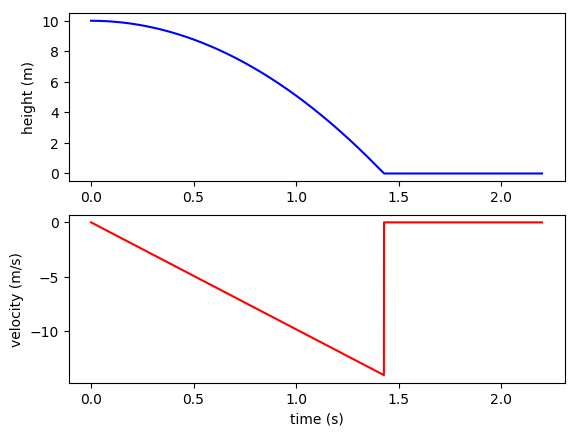

In [31]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')

g = -9.8 #gravitation constant, m/s^2
dt = 0.0001 #timestep, s
timesteps  = 22000 #total number of timesteps to consider

velocity_i = 0.0 #initial velocity, m/s
height_i = 10.0 #initial height, m


velocity_array = np.zeros(timesteps)
height_array  = np.zeros(timesteps)

time_array = np.zeros(timesteps)

height_array[0] = height_i
velocity_array[0] = velocity_i

current_height = height_i

for i in range (0, timesteps-1):
        
        time_array[i+1] = time_array[i] + dt
        velocity_array[i+1] = velocity_array[i] + (g*dt)
        height_array[i+1] = height_array[i] + 0.5*(velocity_array[i]+velocity_array[i+1])*dt

        #if we have reached the ground, zero out the position and velocity
        if height_array[i+1] <= 0:
            velocity_array[i+1] = 0
            height_array[i+1] = 0

ax = plt.subplot(2,1,1)
ax.plot(time_array, height_array, c='blue')

plt.ylabel('height (m)')

ax = plt.subplot(2,1,2)
ax.plot(time_array, velocity_array, c='red')
plt.ylabel('velocity (m/s)')

plt.xlabel('time (s)')

plt.show()

#### Exercise: making the model more complex. 
> We could model "bouncing" by assuming a perfectly elastic collision with the ground.  This can be accomplished by simply changing the sign on the velocity when the ball hits the ground (add this to the code below, look for the comment "# are we contacting the ground?" ). 
 - Try scaling the velocity by 0.75 when the ball contacts the ground in the code below, to make this a more realistic inelastic collision.

> More complex modifications could of course be made to the rules as well (although we will not worry about these for the sake of this simple example).
 - E.g., considering drag (and thus being able to capture terminal velocity), a more rigorous model of energy transfer at ground contact, rotation of the ball, etc. 

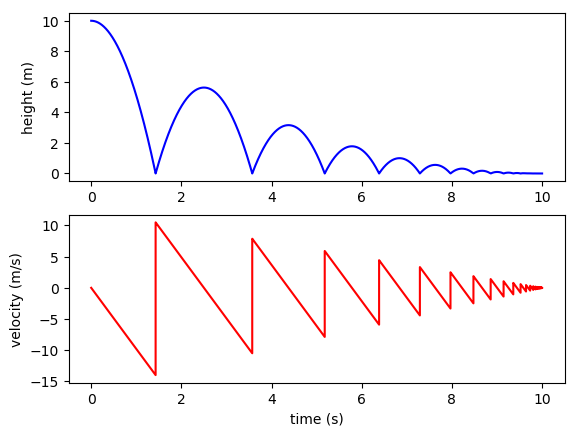

In [33]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('default')


g = -9.8 #gravitation constant
dt = 0.0001 #timestep
timesteps  = 100000 #total number of timesteps to consider

velocity_i = 0.0 #initial velocity
height_i = 10.0 #initial height

velocity_array = np.zeros(timesteps)
height_array  = np.zeros(timesteps)

time_array = np.zeros(timesteps)

height_array[0] = (height_i)
velocity_array[0] = velocity_i

current_height = height_i

for i in range (0, timesteps-1):
        
        time_array[i+1] = time_array[i] + dt
        velocity_array[i+1] = velocity_array[i] + (g*dt)
        height_array[i+1] = height_array[i] + 0.5*(velocity_array[i]+velocity_array[i+1])*dt

        # are we contacting the ground?
        if height_array[i+1] <= 0:
            velocity_array[i+1] = (velocity_array[i] + (g*dt)) * -0.75
            height_array[i+1] = height_array[i] + 0.5*(velocity_array[i]+velocity_array[i+1])*dt

ax = plt.subplot(2,1,1)
ax.plot(time_array, height_array, c='blue')

plt.ylabel('height (m)')

ax = plt.subplot(2,1,2)
ax.plot(time_array, velocity_array, c='red')
plt.ylabel('velocity (m/s)')

plt.xlabel('time (s)')

plt.show()

## What is molecular modeling and simulation?

The cybercamp (and the general research in our groups) is focused on molecular simulation and modeling.  In general, molecular modeling encompasses the theoretical and computational techniques used to model the behavior of atoms, molecules, and "aggregates" of atoms/molecules (e.g., nanoparticles and colloids). 

#### Some common systems we consider include:
 * bulk polymer solutions
 * ionic liquids
 * lipid membranes
 * monolayer coatings on surfaces 
 * fluids confined by pores

#### Molecular modeling and simulation is often used to investigate various aspects of these systems:
  * thermodynamic/thermochemical properties
  * mechanical properties
  * morphologies
  * atomistic/molecular structure
  * spectroscopic properties
  * transport properties
  * determine underlying mechanisms (e.g., relaxation, failure, structural transitions)

## Why is molecular modeling and simulation useful?
#### Molecular modeling and simulation methods are used in a wide variety of fields in addition to chemical engineering, including physics, chemistry, mechanical engineering, materials science, and biology. 
> Molecular modeling and simulation allows researchers to better understand experimental observations and identify underlying mechanisms and can also be used to design and evaluate properties of novel materials.  
>- Computation has been an integral part in the Materials Genome Initiative (MGI), which was put in place with the goal of halving both the cost and time of bringing new materials to market. 
>   - Many of the high profile MGI projects have relied upon molecular modeling and simulation methods to perform large scale screening of the properties of materials to identify promising candidates for the next generation systems in the area of [energy storage](http://www.jcesr.org/scientific-tools/materials-project-electrolyte-genome/), [photovoltaics](http://cleanenergy.molecularspace.org), [gas adsorption](https://www.hydrogen.energy.gov/pdfs/review09/st_33_doonan.pdf), etc. 

### There are many advantages to using molecular modeling and simulation as compared to experiment alone:
#### Allows for the virtual “synthesis” to look for desirable compounds, favorable interactions, and stability. 
>* Can prescreen candidate molecules for specific behavior. 
>* Simulation can be used to establish trends and provide guidance to experiment.

#### Can be used to calculate properties not easily measurable in experiment, as simulation allows for (in most cases) direct observation.  
>* In most methods, we know the 3d spatial coordinates of atoms/molecules in the system at all times, where microscopy is often limited to 2D.  
>* We know the energy, velocity, forces, etc. acting on every atom in the system.
>* Simulation can capture behavior on timescales that may be too fast for experiment
>* Observation does not influence the structure/properties of the simulation. 
>     * E.g., to use TEM/SEM, systems may need to be dried, frozen, or coated and scattering experiments often require using deuterated molecules.

#### Provides explicit control over the system and composition. 
>* E.g., we do not need to worry about experimental impurities/non-idealities and can actually controllably introduce these to the system.    

#### We can  make aphysical changes to the systems and/or independently vary parameters that may be coupled in experiment.  
>* E.g., we can arbitrary change the direction or strength of a dipole moment without having to synthesize a new system; we only need to change the model parameters. 
> * This control allows us to excplicitely test mechanisms/hypotheses. 

####  Allows us to investigate the behavior of hazardous materials safely and expensive materials cheaply.
> * Some of the earliest simulation studies looked at the impact of radiation.



## Tools for molecular modeling and simulation
The cybercamp will  focus on "classical" simulation, as this is the primary area where our groups work. In general, classic simulations relying upon "force fields" (i.e., numerical/analytical functions) to model the interaction between the center-of-mass of atoms (rather than explicitly considering electronic structure).  

There are two main tools used in “classical” simulation:

#### Molecular dynamics (MD) -- Solves Newton’s equations of motion for atoms/particles (similar to the ball falling example).
>* There are many packages to perform MD simulations, here are a few of the common ones:
     * [LAMMPS](http://LAMMPS.sandia.gov)
     * [GROMACS](http://gromacs.org)
     * [HOOMD-Blue](http://glotzerlab.engin.umich.edu/hoomd-blue/)
     * [NAMD](https://www-s.ks.uiuc.edu/Research/namd/)
     * [DLPoly](https://www.scd.stfc.ac.uk/Pages/DL_POLY.aspx)
     * [CHARMM](https://www.charmm.org)

#### Monte Carlo (MC) -- Stochastically generates configurations according to probabilities
>* There are freely available packages for MC simulation, although far fewer in number than MD. These include:
     * [Cassandra](http://cassandra.nd.edu)
     * [GOMC](http://gomc.eng.wayne.edu)
     * [HOOMD-Blue](http://glotzerlab.engin.umich.edu/hoomd-blue/)
     * [MCCCS Towhee](http://towhee.sourceforge.net/code/download.html)
     
The Cybercamp will focus primarily on MD simulation, since this is the method most people will be using in their research in the groups. 